<img src="https://logodownload.org/wp-content/uploads/2017/09/mackenzie-logo.png" height="200" width="200" align="left">
<br><br><br>

### Grupo 1 - Women in the Workforce

CURSO: CIENCIA DE DADOS;<br>
COMPONENTE CURRICULAR: ANÁLISE EXPLORATÓRIA DE DADOS;<br>
SEMESTRE: 2023/1.

ALUNOS:<br>
LEONARDO DOS REIS OLHER - TIA: 22510249;<br>
GABRIELA OHASHI DE SOUZA - TIA: 22521097;<br>
MARINA OHASHI DE SOUZA - TIA: 22520971;<br>
MARCOS ANTONIO PIRES - TIA: 22508341.<br>

### Perguntas a serem respondidas
<br>
<li>A distribuição dos trabalhadores é simétrica?</li>
<li>Há alguma área em que as mulheres ganham mais que os homens?</li>
<li>Em algum momento o salário médio das mulheres superou o dos homens?</li>
<li>É possível perceber uma melhora na remuneração feminina comparativamente à masculina no decorrer dos anos?</li>
<li>Houve evolução na diferença salarial entre homens e mulheres ao longo das décadas?</li>
<li>A evolução da porcentagem do salário feminino sobre o masculino ocorre de forma linear para todas as idades?</li>

### Importar bibliotecas

In [1]:
import pandas as pd # manipular dataframes
import numpy as np # manipular arrays
import matplotlib.pyplot as plt # plotar grafico
import seaborn as sns # criar grafico
from statistics import mode # estatistica: moda
import warnings; warnings.filterwarnings('ignore') # remover avisos

### Carregar DataFrames

In [2]:
earnings = pd.read_csv ('https://raw.githubusercontent.com/rfordatascience'
                        '/tidytuesday/master/data/2019/2019-03-05/earnings_female.csv')

jobs = pd.read_csv ('https://raw.githubusercontent.com/rfordatascience/'
                    'tidytuesday/master/data/2019/2019-03-05/jobs_gender.csv')

### Verificação de dados:
<br>
<li>Cabeçalho;</li>
<li>Tamanho DataFrames (linhas, colunas);</li>
<li>Dados nulos;</li>
<li>Linhas duplicadas;</li>
<li>Tipo das colunas (Dtype).</li>

In [3]:
print('-'*50)
display(earnings.head(), earnings.shape)
display(jobs.head(), jobs.shape)

print('-'*50)
print(earnings.isnull().sum(), end='\n\n')
print(jobs.isnull().sum(), end='\n\n')

print('-'*50)
print(f'Duplicadas Earnings: {earnings.duplicated().sum()}', end='\n\n')
print(f'Duplicadas Jobs: {jobs.duplicated().sum()}', end='\n\n')

print('-'*50)
print(earnings.info(), end='\n\n')
print(jobs.info(), end='\n\n')

print('-'*50)
print('Occupation:', len(jobs['occupation'].unique()))
print('Major_category:', len(jobs['major_category'].unique()))
print('Minor_category:', len(jobs['minor_category'].unique()))


--------------------------------------------------


,Year,group,percent
0,1979,"Total, 16 years and older",62.3
1,1980,"Total, 16 years and older",64.2
2,1981,"Total, 16 years and older",64.4
3,1982,"Total, 16 years and older",65.7
4,1983,"Total, 16 years and older",66.5


(264, 3)

,year,occupation,major_category,minor_category,total_workers,workers_male,workers_female,percent_female,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
0,2013,Chief executives,"Management, Business, and Financial",Management,1024259,782400,241859,23.6,120254,126142.0,95921.0,76.042080
1,2013,General and operations managers,"Management, Business, and Financial",Management,977284,681627,295657,30.3,73557,81041.0,60759.0,74.973162
2,2013,Legislators,"Management, Business, and Financial",Management,14815,8375,6440,43.5,67155,71530.0,65325.0,91.325318
3,2013,Advertising and promotions managers,"Management, Business, and Financial",Management,43015,17775,25240,58.7,61371,75190.0,55860.0,74.291794
4,2013,Marketing and sales managers,"Management, Business, and Financial",Management,754514,440078,314436,41.7,78455,91998.0,65040.0,70.697189


(2088, 12)

--------------------------------------------------
Year       0
group      0
percent    0
dtype: int64

year                       0
occupation                 0
major_category             0
minor_category             0
total_workers              0
workers_male               0
workers_female             0
percent_female             0
total_earnings             0
total_earnings_male        4
total_earnings_female     65
wage_percent_of_male     846
dtype: int64

--------------------------------------------------
Duplicadas Earnings: 0

Duplicadas Jobs: 0

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     264 non-null    int64  
 1   group    264 non-null    object 
 2   percent  264 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.3+ KB
None

<class 'pandas.core.frame.

### Limpeza de dados
<br>
<li>Remover colunas de porcentagem;</li>
<li>Remover dados nulos;</li>


In [4]:
jobs.drop(['percent_female','wage_percent_of_male'], axis=1, inplace=True)
jobs.dropna(inplace=True)
print(jobs.isnull().sum().sum()) # soma dados nulos

0


### Geração de novos DataFrames
<br>
<li>DF salario_occ: salário medio por major_category</li>
<li>DF salario_year: salário medio por ano</li>

In [5]:
# Salario medio por major_category:
salario_occ = jobs.groupby('major_category', as_index=False).agg({'total_earnings':'mean',
                                                                  'total_earnings_male':'mean',
                                                                  'total_earnings_female':'mean'})

salario_occ = pd.melt(salario_occ, id_vars='major_category', var_name='Earnings', value_name='Valor')
display(salario_occ.head())

salario_year = jobs.groupby('year', as_index=False).agg({'total_earnings':'mean',
                                                         'total_earnings_male':'mean',
                                                         'total_earnings_female':'mean'})

salario_year = pd.melt(salario_year, id_vars='year', var_name='Earnings', value_name='Valor')
display(salario_year)

,major_category,Earnings,Valor
0,"Computer, Engineering, and Science",total_earnings,76535.731915
1,"Education, Legal, Community Service, Arts, and...",total_earnings,49832.494048
2,Healthcare Practitioners and Technical,total_earnings,74269.032258
3,"Management, Business, and Financial",total_earnings,65564.551724
4,"Natural Resources, Construction, and Maintenance",total_earnings,43232.319149


,year,Earnings,Valor
0,2013,total_earnings,48535.873267
1,2014,total_earnings,49202.312871
2,2015,total_earnings,49879.304348
3,2016,total_earnings,50946.998012
4,2013,total_earnings_male,52053.223762
5,2014,total_earnings_male,52827.699010
6,2015,total_earnings_male,53388.885375
7,2016,total_earnings_male,54607.660040
8,2013,total_earnings_female,43493.524752
9,2014,total_earnings_female,44346.025743


### Densidade
<h4>Distribuição de trabalhadores</h4>
<p>
Podemos verificar que temos a média maior do que a mediana, e a mediana é maior do que a moda (Mo < Md < x̅) para todos os casos, o que indica que a distribuição dos dados é assimétrica e com cauda à direita.
</p>

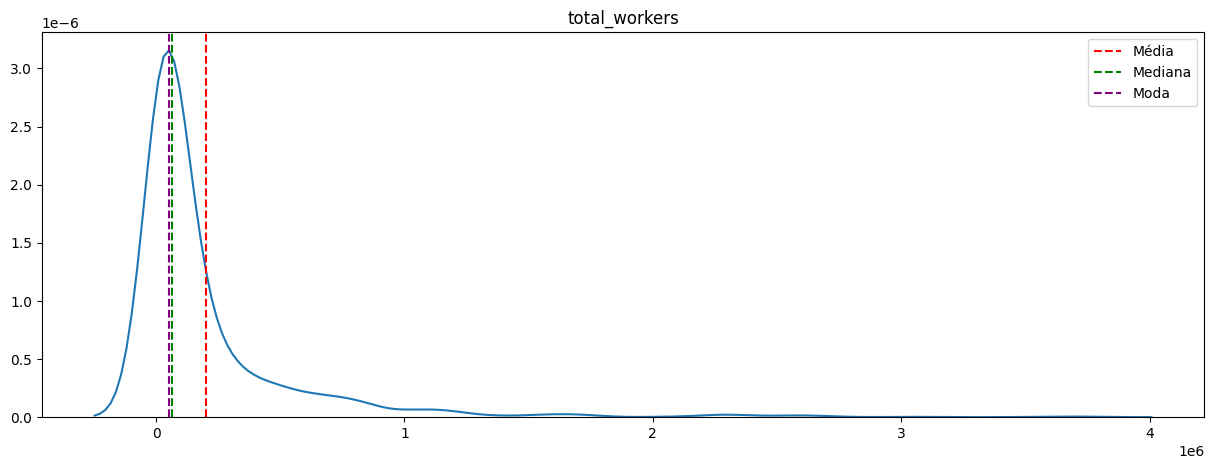

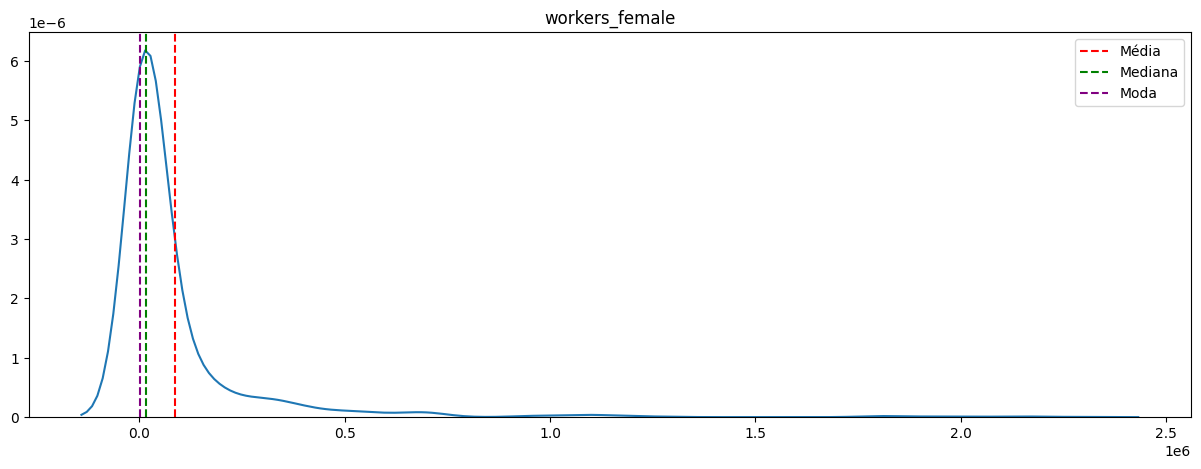

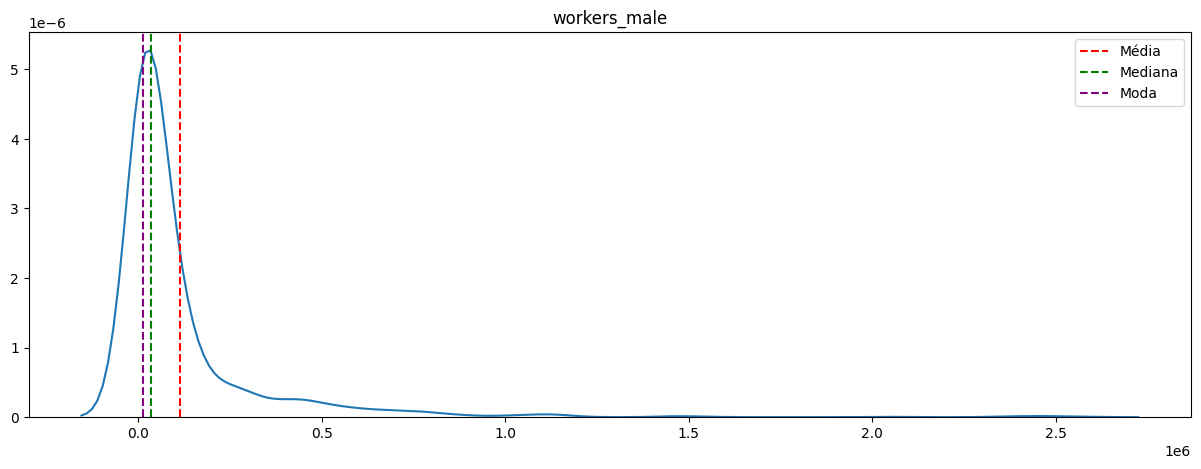

In [6]:
cols = ['total_workers', 'workers_female', 'workers_male']

for col in cols:
    fig, ax = plt.subplots(figsize=(15, 5)) # Ajuste Tamanho
    sns.kdeplot(x=jobs[col])
    media = np.mean(jobs[col])
    mediana = np.median(jobs[col])
    moda = mode(jobs[col].to_list())

    plt.axvline(np.mean(jobs[col]), color='red', linestyle='--', label='Média')
    plt.axvline(np.median(jobs[col]), color='green', linestyle='--', label='Mediana')
    plt.axvline(mode(jobs[col].to_list()), color='purple', linestyle='--', label='Moda')

    plt.legend()
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Barplot

<h4>Grafico de barras salário medio por gênero.</h4>

<p style="text-align: justify">
Na analise abaixo podemos verificar que os homens têm médias salariais acima da média geral em todas as Major Category, enquanto as mulheres têm médias salariais abaixo da média geral em todas as principais categorias, isso pode indicar uma diferença significativa na remuneração por gênero.
</p>


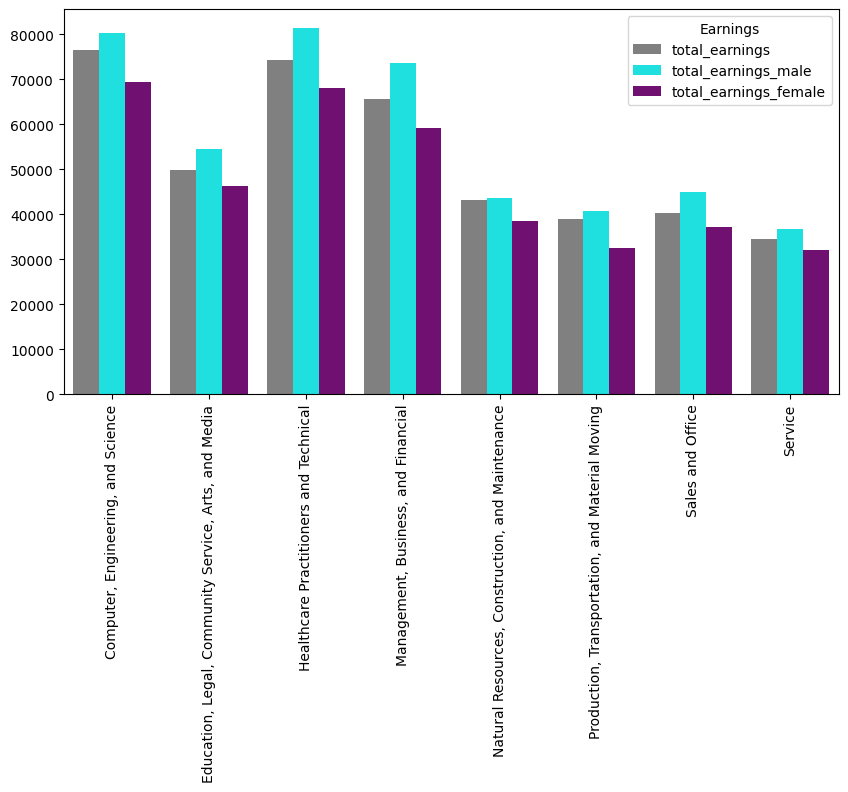

In [7]:
fig, ax = plt.subplots(figsize=(10, 5)) # Ajuste Tamanho

cores = {'total_earnings_male':'cyan',
         'total_earnings_female':'purple',
         'total_earnings':'gray'}

sns.barplot(x=salario_occ['major_category'], y=salario_occ['Valor'], hue=salario_occ['Earnings'], palette=cores)

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Lineplot

<h4>Evolução do salário medio ao longo do tempo.</h4>

<p style="text-align: justify">
Ao analisar o grafico que apresenta informações sobre a evolução dos salários médios ao longo do tempo, é possível notar que há uma tendência de aumento nos valores ao longo dos anos. Entretanto, ao comparar os salários médios por gênero, é possível identificar uma disparidade significativa. De acordo com os dados apresentados no dataframe, o salário médio das mulheres sempre ficou abaixo do salário médio dos homens. </p>

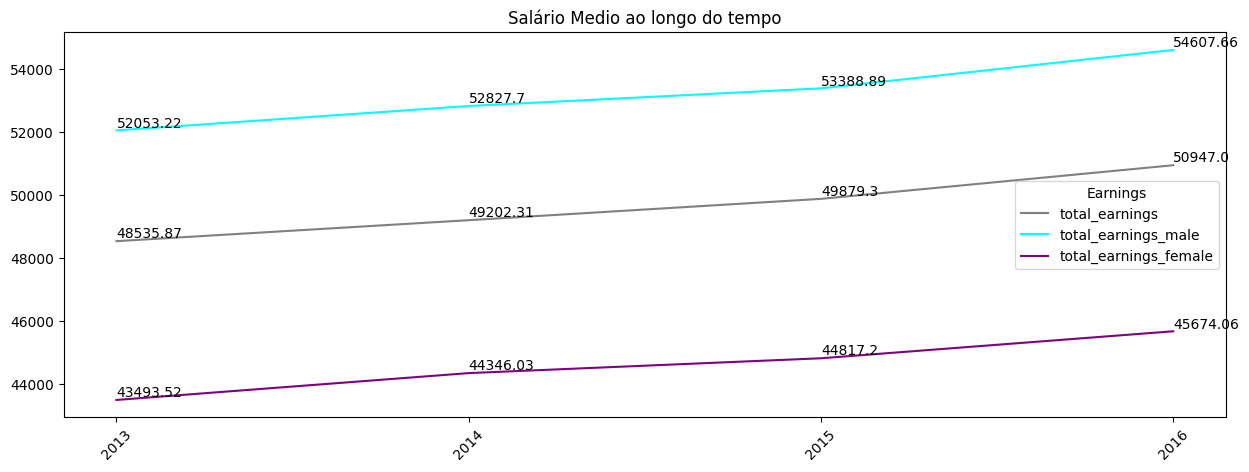

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=salario_year['year'].apply(lambda x: str(x)),
             y=salario_year['Valor'], hue=salario_year['Earnings'], palette=cores, markers=True)

for i in range(0,salario_year.shape[0]):
    plt.annotate(text=str(round(salario_year['Valor'].iloc[i],2)),
                 xy=(str(salario_year['year'].iloc[i]), salario_year['Valor'].iloc[i]+100))

plt.xlabel('')
plt.ylabel('')
plt.title('Salário Medio ao longo do tempo')
plt.xticks(rotation=45)
plt.show()

### Lineplot
<h4>Porcentagem do salário feminino sobre o salário masculino por faixa etária de idade ao longo dos anos</h4>

<p style="text-align: justify">
Ao analisar um gráfico que apresenta dados sobre a diferença salarial entre homens e mulheres em diferentes faixas etárias, podemos perceber que essa disparidade é presente em todas as idades, e que em nenhum momento as mulheres ganham mais que os homens em média.

No entanto, o gráfico também mostra que houve uma época em que essa diferença salarial foi ainda mais acentuada: entre as décadas de 1970 e 1980. Nesse período, a diferença salarial chegou a atingir valores de 56% do salário dos homens, o que é alarmante e evidencia um problema grave de desigualdade de gênero.

Felizmente, o gráfico também revela que nos tempos atuais essa diferença vem diminuindo gradualmente ao longo do tempo. Essa é uma boa notícia, pois indica que as políticas e ações voltadas para a promoção da igualdade de gênero têm surtido efeito e ajudado a corrigir essa injustiça.
</p>

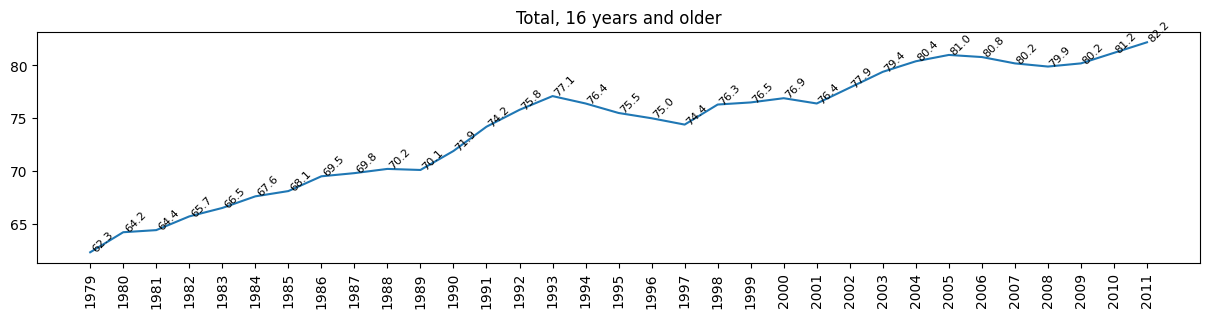

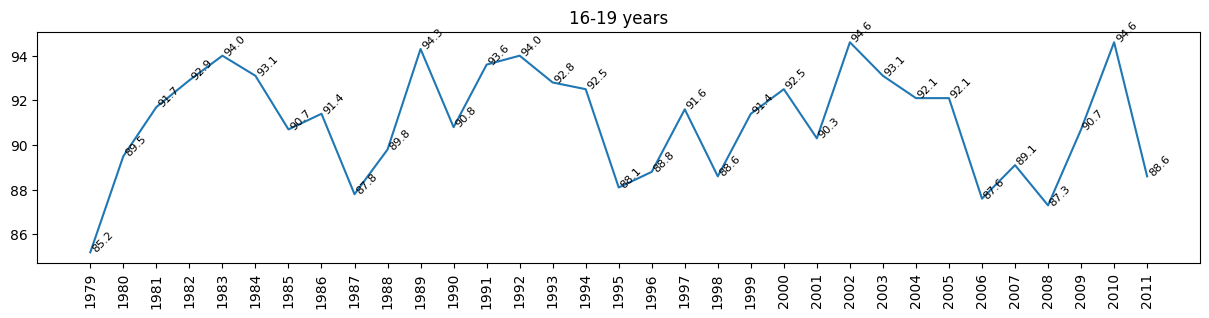

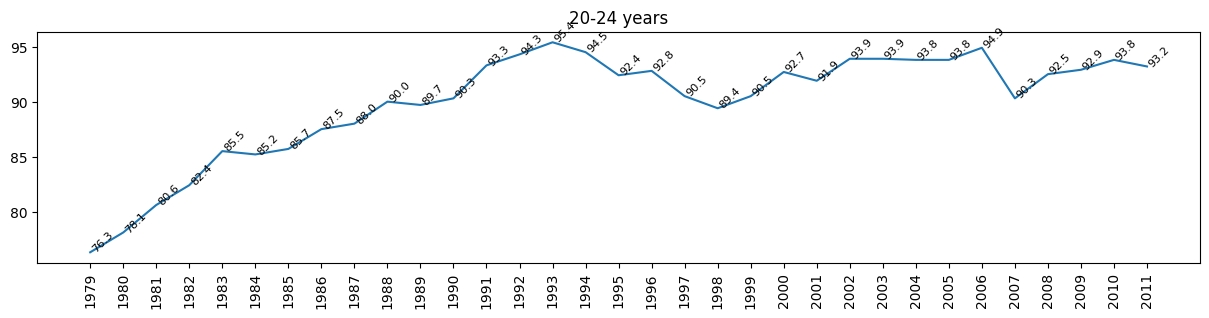

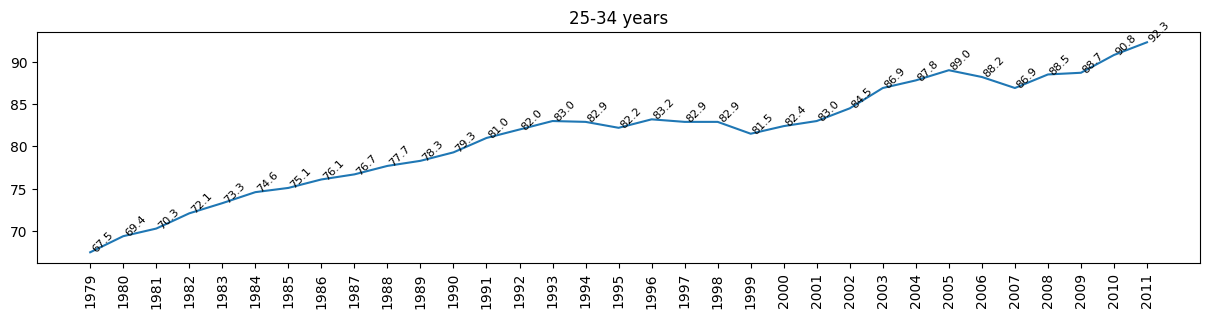

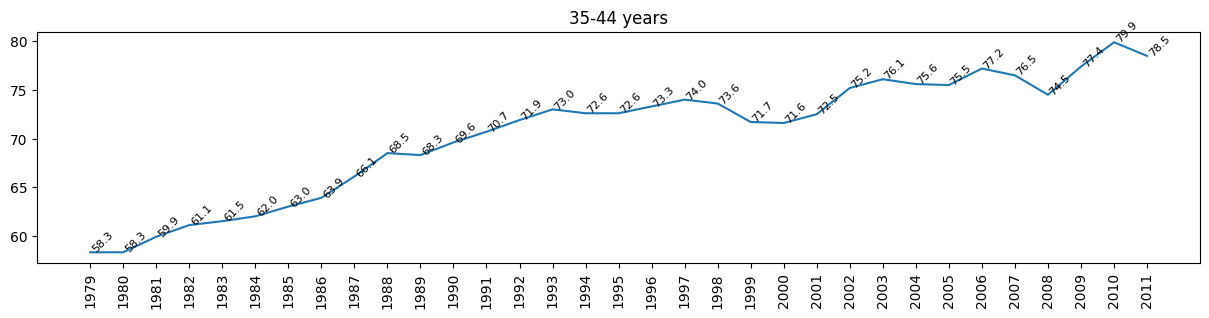

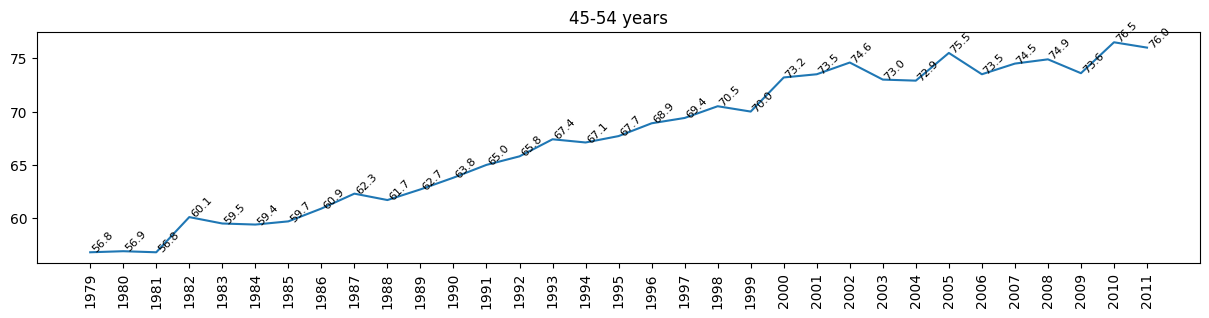

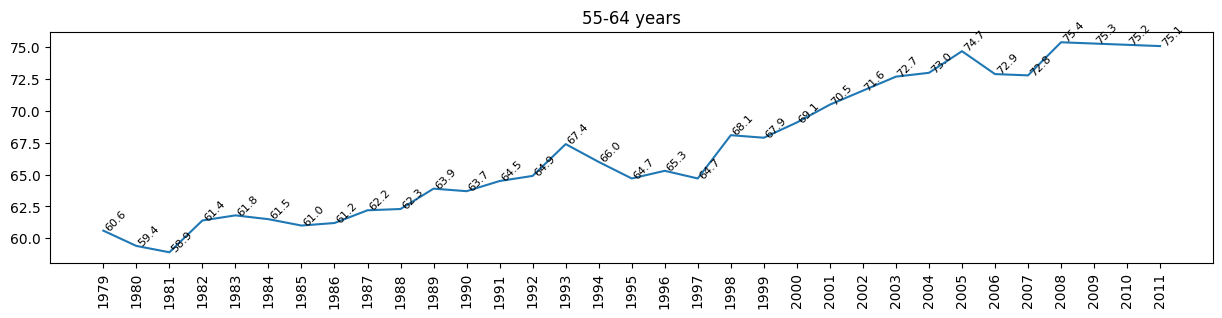

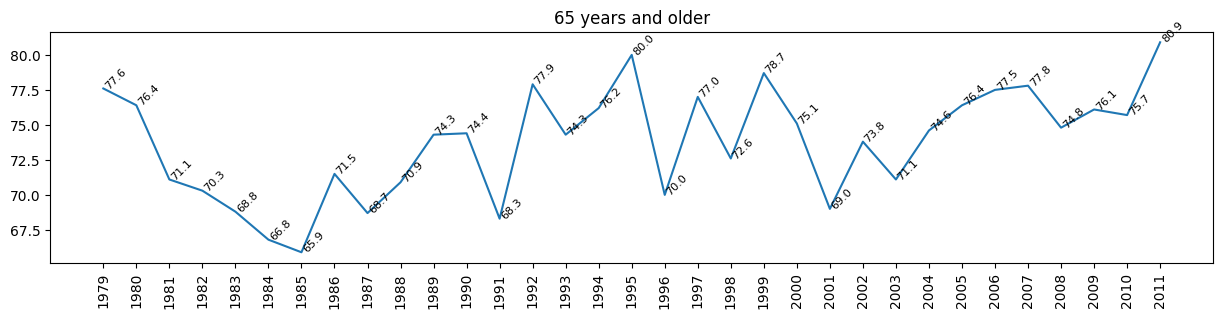

In [9]:
for cat in earnings['group'].unique():
    fig, ax = plt.subplots(figsize=(15, 3))
    df = earnings[earnings['group'] == cat]
    sns.lineplot(x=df['Year'], y=df['percent'], markers=True)
    
    for valor in range(df.shape[0]):
        plt.annotate(text=str(df['percent'].iloc[valor]), 
                     xy=(df['Year'].iloc[valor],df['percent'].iloc[valor]), rotation=45, fontsize=8)
        
    plt.xticks(ticks=df['Year'].unique(), rotation=90)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(cat)
    plt.show()

### Lineplot
<h4>Porcentagem do salário feminino sobre o salário masculino a cada década por idade</h4>

<p style="text-align: justify">
Ao analisar um gráfico que mostra a evolução da diferença salarial entre homens e mulheres ao longo das décadas, podemos perceber que essa disparidade vem diminuindo gradualmente com o passar do tempo. 
</p>

<p style="text-align: justify">
No entanto, é importante notar que mesmo com essa tendência de diminuição, ainda há uma disparidade salarial entre homens e mulheres, especialmente em relação às mulheres mais velhas. Essa disparidade salarial é preocupante, pois pode ter impactos negativos na vida das mulheres, como uma aposentadoria menos confortável e uma vida financeira menos estável. 
</p>

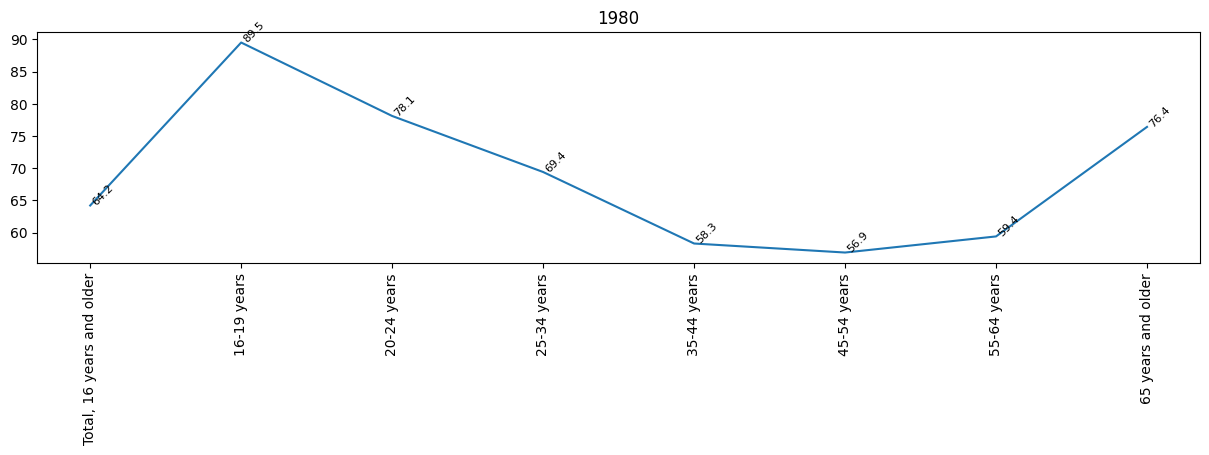

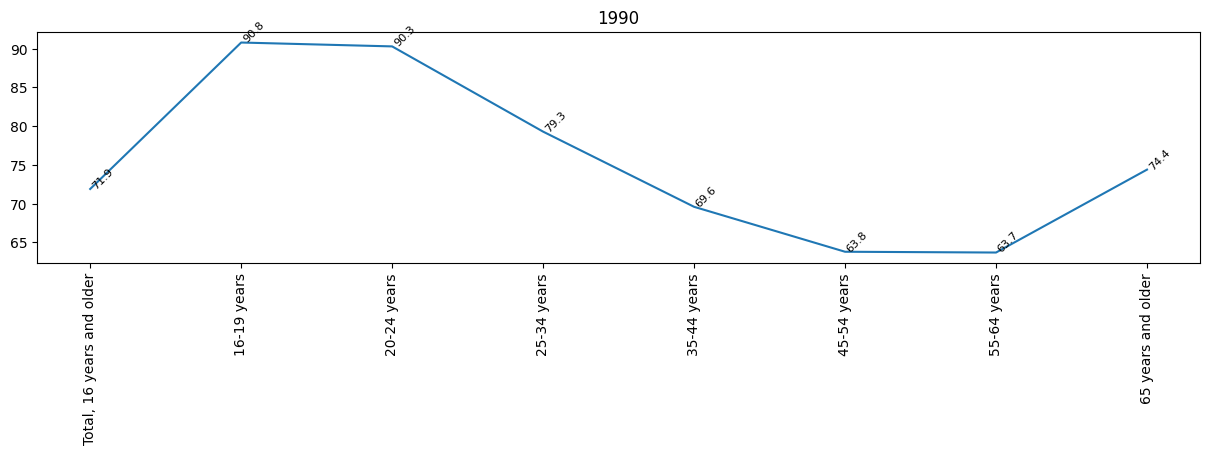

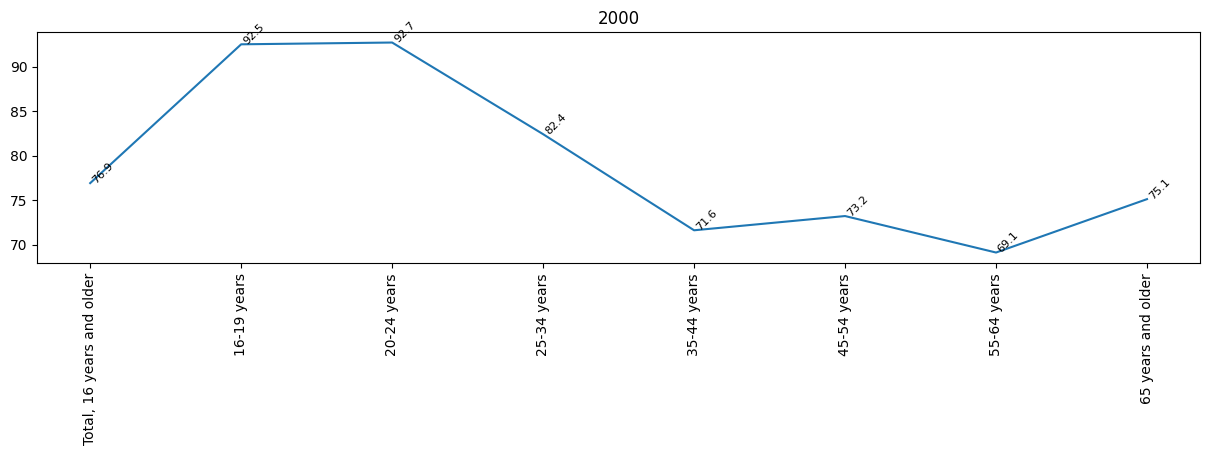

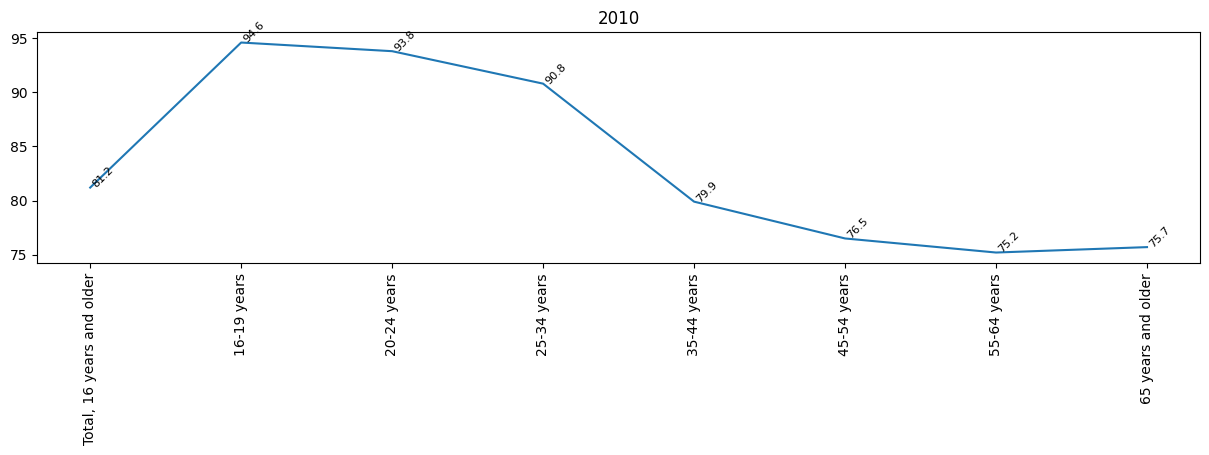

In [10]:
# extrair do df anos que iniciam as decadas (que terminam em 0):
anos = []
for ano in earnings['Year'].drop_duplicates().to_list(): 
    if str(ano)[3] == '0' and ano not in anos:
        anos.append(ano)

# filtra apenas anos que iniciam a decada no df:
for ano in anos:
    fig, ax = plt.subplots(figsize=(15, 3))
    df = earnings[earnings['Year'] == ano]
    sns.lineplot(x=df['group'], y=df['percent'], markers=True)
    
    for valor in range(df.shape[0]):
        plt.annotate(text=str(df['percent'].iloc[valor]), 
                     xy=(df['group'].iloc[valor],df['percent'].iloc[valor]), rotation=45, fontsize=8)
        
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(ano)
    plt.show()

### Boxplot

<h4>Q1, Q2(Mediana), Q3 por faixa etária de idades</h4>

<p style="text-align: justify">
Ao analisar os dados de salários de homens e mulheres em diferentes faixas etárias, podemos observar que a mediana dos salários das mulheres entre 16 e 26 anos de idade está mais próxima dos valores dos homens. Isso sugere que nessa faixa etária as mulheres estão conseguindo um nível de remuneração mais igualitário em relação aos homens, o que pode ser reflexo das políticas e ações voltadas para a igualdade de gênero.
    
No entanto, ao analisar a mediana dos salários das mulheres em faixas etárias mais avançadas, observamos uma diminuição considerável em relação à mediana dos salários dos homens.
</p>

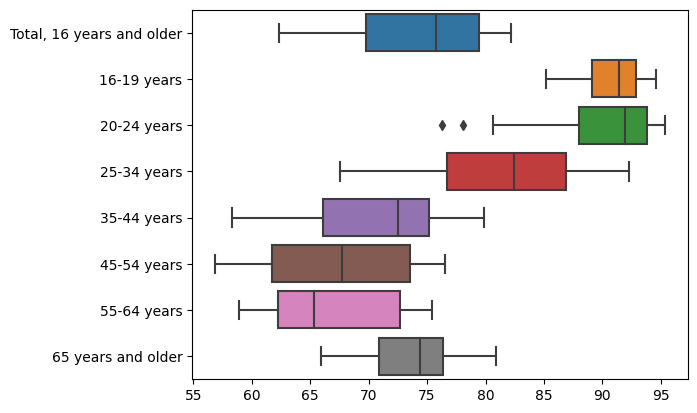

In [11]:
sns.boxplot(x=earnings['percent'], y=earnings['group'], orient='h') # boxplot na horizontal

plt.xlabel('')
plt.ylabel('')
plt.show()